# Assignment 2: Clustering

## Implement K-Means and Performance Analysis

    We can create a random dataset with a 1000 datapoints and with 4 centers.

In [1]:
from sklearn.datasets import make_blobs
from cluster import cluster as MyKMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

    We can generate clusters using our implemetation as well as Scikit-Learn's implementation of KMeans.

In [2]:
X, cluster_assignments = make_blobs(n_samples=1000, centers=4, cluster_std=0.60, random_state=0)

my_kmeans = MyKMeans(k=4)

# Labels and Centroids for my KMeans implementation 
my_labels, my_centroids = my_kmeans.fit(X)

sklearn_kmeans = KMeans(n_clusters=4, random_state=0)
sklearn_kmeans.fit(X)

# Labels and Centroids for SKLearn's KMeans implementation 
sklearn_labels = sklearn_kmeans.labels_

    Comparing the silhouette scores for both, we can see that theyre quite similar and closer to 1. This implies that our implementation is valid. However, it must be noted that there are run throughs where our custom implementation is not as good. Sometimes randomness works against our implementation as it only runs the KMeans algorithm once.

In [3]:
from sklearn.metrics import silhouette_score

custom_silhouette = silhouette_score(X, my_labels)
sklearn_silhouette = silhouette_score(X, sklearn_labels)

print("My KMeans: ", custom_silhouette)
print("Scikit-learn KMeans: ", sklearn_silhouette)

My KMeans:  0.6773333224010808
Scikit-learn KMeans:  0.6773333224010808


In [4]:
from sklearn.metrics.cluster import v_measure_score

my_score = v_measure_score(cluster_assignments, my_labels)
sk_score = v_measure_score(cluster_assignments, sklearn_labels)

print("VMeasure for My KMeans: ", my_score)
print("VMeasure for Scikit-learn KMeans: ", sk_score)

VMeasure for My KMeans:  0.986893050256657
VMeasure for Scikit-learn KMeans:  0.986893050256657


### Plotting KMeans Results
    Plotting our results with the actual labels as well as scikit-learns labels, we can see that the results are quite similar. Clusters have been identified correctly. It can also be observed that the incorrectly labeled values are in fact very far from the the actual assigned cluster which is why even scikit-learn fails to identify these correctly

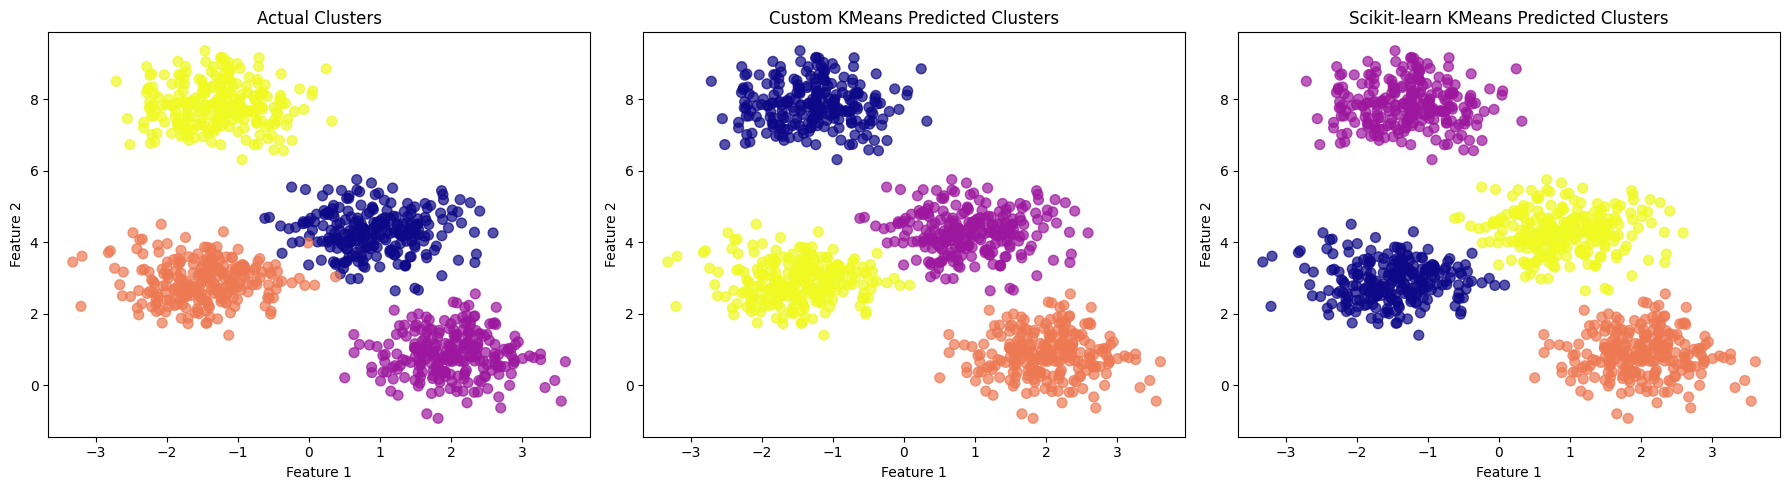

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Actual Labels
axes[0].scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='plasma', marker='o', s=50, alpha=0.7)
axes[0].set_title('Actual Clusters')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# My Custom KMeans Labels
axes[1].scatter(X[:, 0], X[:, 1], c=my_labels, cmap='plasma', marker='o', s=50, alpha=0.7)
axes[1].set_title('Custom KMeans Predicted Clusters')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Scikit-learn KMeans Labels
axes[2].scatter(X[:, 0], X[:, 1], c=sklearn_labels, cmap='plasma', marker='o', s=50, alpha=0.7)
axes[2].set_title('Scikit-learn KMeans Predicted Clusters')
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

## Choose and run clustering algorithms

### Chicago Taxi Trip Data

- Looking at the Chicago Taxi Trip data, we can see that it has a little over a 100,000 rows and 22 features documenting taxi trips in the city of Chicago.
- Pickup and Dropoff Census Tract constitute most of the missing data in this dataset with over 2/3rds of the values missing.

In [6]:
df = pd.read_csv('Taxi Trips 2013-2023.csv')
df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [8]:
df.describe()

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,101763.000000,101788.000000,3.517900e+04,3.505400e+04,95650.000000,92192.000000,101681.000000,101681.000000,101681.000000,101681.000000,101681.000000,95657.000000,95657.000000,92489.000000,92489.000000
mean,1102.644891,6.021135,1.703149e+10,1.703140e+10,33.230946,25.300764,20.466054,2.452347,0.014503,1.679117,24.739358,41.898703,-87.689956,41.892116,-87.657546
std,1831.031101,7.572349,3.696445e+05,3.377955e+05,25.309183,20.270499,18.103452,3.918353,0.602782,5.208910,22.641634,0.064621,0.104274,0.059306,0.063430
min,0.000000,0.000000,1.703101e+10,1.703101e+10,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.660136,-87.913625,41.660136,-87.913625
25%,420.000000,0.870000,1.703108e+10,1.703108e+10,8.000000,8.000000,7.750000,0.000000,0.000000,0.000000,9.500000,41.878866,-87.695013,41.878866,-87.663518
50%,836.000000,2.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,13.500000,0.000000,0.000000,0.000000,16.000000,41.895033,-87.642649,41.892508,-87.633308
75%,1516.000000,10.800000,1.703184e+10,1.703184e+10,50.000000,32.000000,31.000000,3.000000,0.000000,1.000000,33.900000,41.949829,-87.626211,41.922686,-87.625192
max,86003.000000,814.300000,1.703198e+10,1.703198e+10,77.000000,77.000000,999.000000,250.000000,78.000000,182.000000,999.000000,42.015934,-87.534903,42.021224,-87.534903


### Missing data
    For our analysis, we will be looking at the pickup location data only. Both Longitude and Lattitude for pickup have 6131 rows of missing data. In fact these missing values appear in the same rows. We can remove these rows before performing our clustering analysis.

In [9]:
print(f"Number of rows where Latitude data is missing: {df['Pickup Centroid Latitude'].isna().sum()}")

Number of rows where Latitude data is missing: 6131


In [10]:

print(f"Number of rows where longitude data is missing: {df['Pickup Centroid Longitude'].isna().sum()}")

Number of rows where longitude data is missing: 6131


In [11]:
missing_lat_and_long = df[df['Pickup Centroid Latitude'].isna() & df['Pickup Centroid Longitude'].isna()].shape[0]
print(f"Number of rows where both latitude and longitude data are missing: {missing_lat_and_long}")

Number of rows where both latitude and longitude data are missing: 6131


### The reason why you chose the clustering algorithm(s). 
    I am using KMeans for this question as DBSCAN would require a fixed eps value. Looking at how the datapoints are spread out on the plot given below, we can see that some of the areas are dense whereas others are sparse. Picking a small eps would group the dense area as a single cluster however, the sparse points would be represented as a cluster of its own. I have chosen to use KMeans as that would allow me to group the city into distinct clusters despite the difference in density of points.

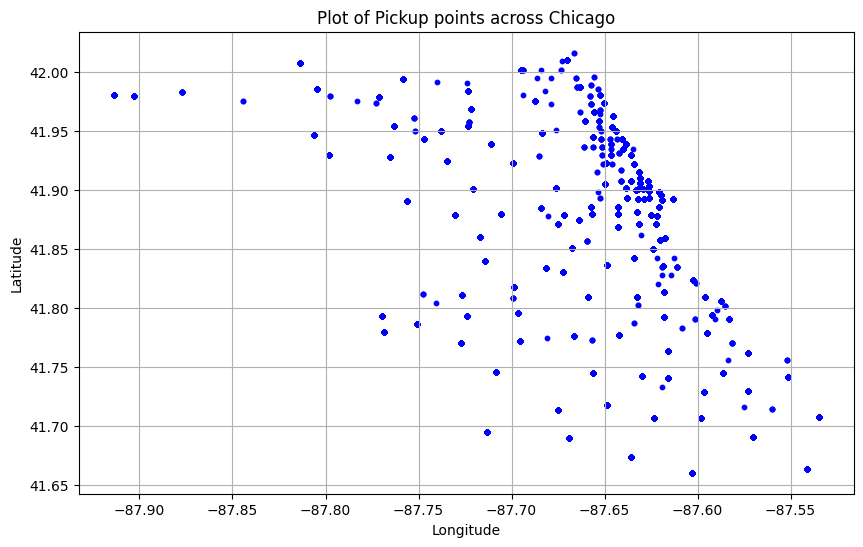

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Pickup Centroid Longitude'], df['Pickup Centroid Latitude'], c='blue', s=10)
plt.title('Plot of Pickup points across Chicago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

### Any pre-processing of the data or any hyperparameter settings

- First we remove all rows that are missing pickup longitude and latitude data.
- We then standardize the data as KMeans uses the euclidean distance between points to assign them to clusters. Features that are on larger scales can disproportionately influence the cluster assignments.
- Then we can run the elbow test in order to determine the optimal number of clusters.
- 4 is the optimal k value as it is an inflection point on the graph below

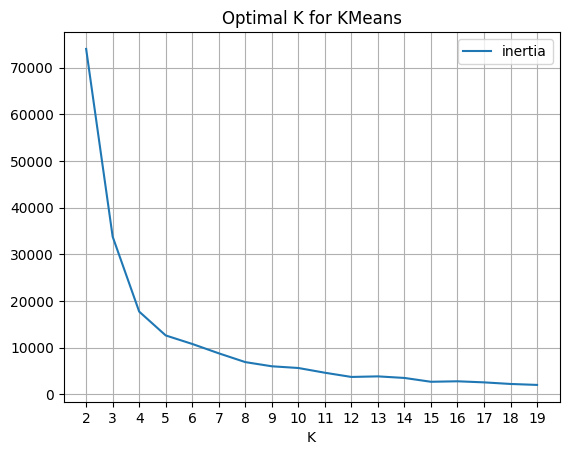

In [13]:
location_data = df[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']].dropna()

# Standardize
scaler = StandardScaler()
location_data_scaled = scaler.fit_transform(location_data)

inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(location_data_scaled)
    inertias.loc[k] = kmeans.inertia_

kmeans = KMeans(n_clusters=4)

inertias.plot()
plt.xticks(range(2, 20))
plt.grid(True)
plt.title('Optimal K for KMeans')
plt.xlabel('K')
plt.show()

### Output from the algorithm(s) -- show what clusters were generated

- We can see 4 clusters below after running KMeans. The blue cluster shows the dense downtown area. It makes sense for there for be lots of pickups there as that is where most people go to work and it is also the part of the city that acts as a hub for all public transport.
- The other 3 clusters represent the less dense suburban areas of the city.
- Taking public transport as a proxy for density, we can see that the blue cluster coincides with the part of the city that has the greatest density of subway lines running through it

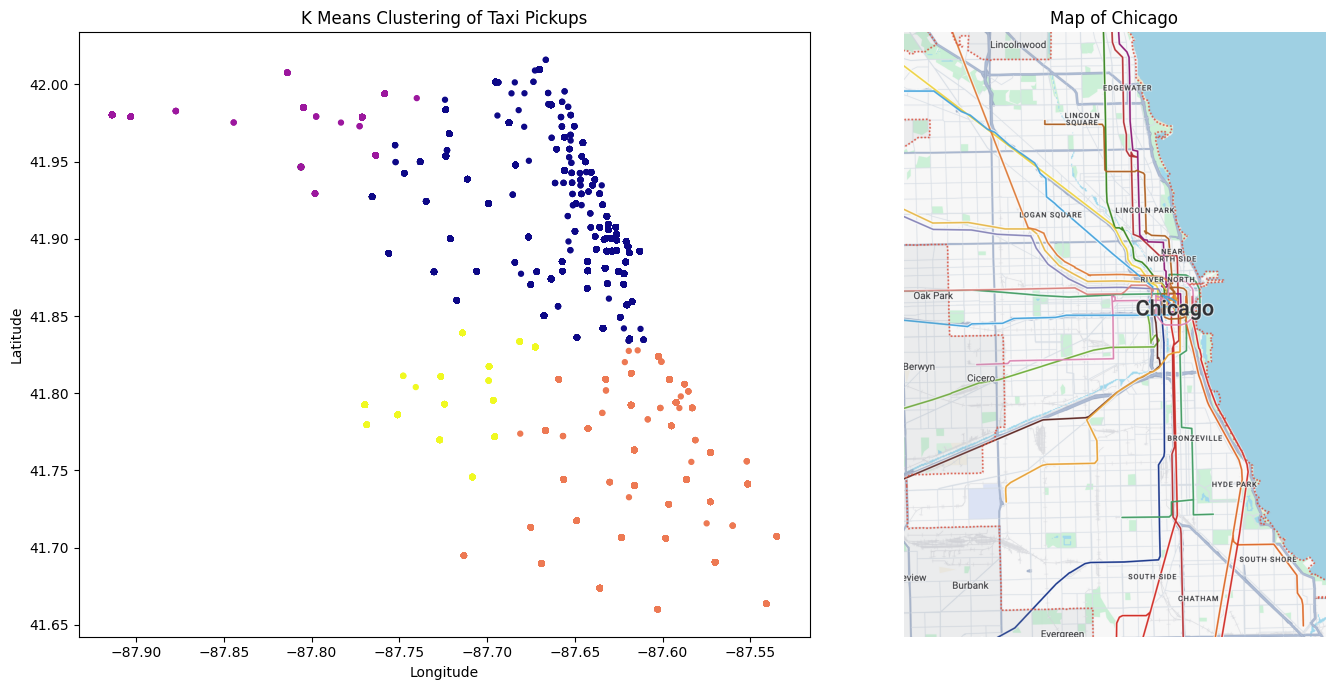

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sklearn_kmeans = KMeans(n_clusters=4, random_state=0)
sklearn_kmeans.fit(location_data_scaled)
sklearn_labels = sklearn_kmeans.labels_

# Load the map image
map_img = mpimg.imread('chicago.png')


fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Cluster plot
ax[0].scatter(location_data.iloc[:, 1], location_data.iloc[:, 0], c=sklearn_labels, cmap='plasma', marker='.', s=50)
ax[0].set_title('K Means Clustering of Taxi Pickups')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

# Image
ax[1].imshow(map_img)
ax[1].set_title('Map of Chicago')
ax[1].axis('off') 

plt.tight_layout()
plt.show()

### The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

    The silhouette_score indicates that we have good performance. The data points are relatively well matched to their own clusters and fairly well separated from other clusters.

In [15]:
sklearn_silhouette = silhouette_score(location_data_scaled, sklearn_labels)
print("Scikit-learn KMeans: ", sklearn_silhouette)

Scikit-learn KMeans:  0.6991851328343985


## MOPSI Dataset

    This dataset contains longitude and latitudes. Exploring it we can see:
    - The data is not comma seperated data. We need to add in our own delimeter.
    - The values for longitude and latitude are scaled up by 10000. This shouldn't be an issue for KMeans but might cause trouble for DBSCAN when we try to set the eps.
    - There are no missing values.
    

In [16]:
mp = pd.read_csv('mopsi.txt', sep='\t', header=None, names=['latitude','longitude'])
mp

,latitude,longitude
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [17]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   latitude   13467 non-null  int64
 1   longitude  13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


### The reason why you chose the clustering algorithm(s)

    For this dataset I have used both the KMeans and DBSCAN algorithm. This dataset contains people's location data from their day to day activities while living in Finland. 
    
    We do not really know how many clusters to expect as we do not know how many major population centers there are in Finland. For KMeans we can run an elbow test to find the optimal number of clusters.

    With DBSCAN we can set an eps and min_sample value and let the algorithm tell us how many clusters there should be. This can be an indicator of how many population centers there are in Finland

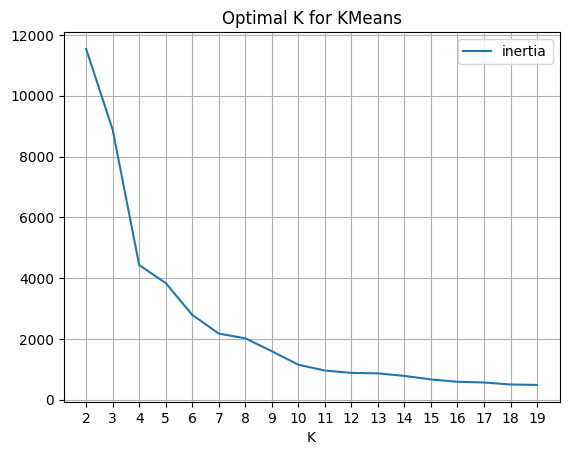

In [18]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns=['inertia'])

ss = StandardScaler()
mp_scaled = ss.fit_transform(mp)

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(mp_scaled)
    inertias.loc[k] = kmeans.inertia_

kmeans = KMeans(n_clusters=4)

inertias.plot()
plt.xticks(range(2, 20))
plt.grid(True)
plt.title('Optimal K for KMeans')
plt.xlabel('K')
plt.show()

### Any pre-processing of the data or any hyperparameter settings

- For KMeans we do not need to do anything other than standardizing our data as there are no missing values and no other adjustments can be made to the data.

- For DBSCAN, we can adjust the Lat and Long values to their actual values by dividing by 10000 so that we can use a reasonable eps value

### Output from the algorithm(s) -- show what clusters were generated

- For KMeans we chose k=5 as that is the inflection point on our elbow test graph. We can see 5 clusters on the graph and these correspond directly with population density maps of Finland. The dense part in the pink cluster is Helsinki.
- For DBSCAN, I chose a high min_sample and eps value because I only wanted to form a cluster when the denisty is high. This is because I wanted to see if the clustering could identify major population centers in Finland. The red dots show up as noise but that can be interpreted as regions that are very low density in Finland.

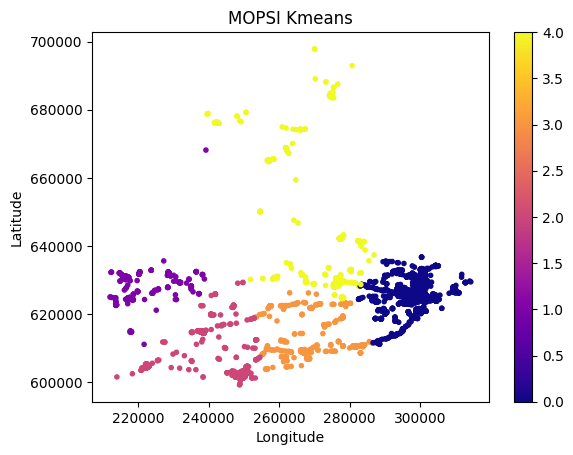

In [19]:
ss = StandardScaler()
mp_scaled = ss.fit_transform(mp)

sklearn_kmeans = KMeans(n_clusters=5, random_state=0)
sklearn_kmeans.fit(mp)
sk_labels = sklearn_kmeans.labels_

# Plotting
plt.scatter(mp.iloc[:, 1], mp.iloc[:, 0], c=sk_labels, cmap='plasma', marker='.')
plt.title('MOPSI Kmeans')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
plt.show()

### The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

- KMeans with k=5, has the best silhouette score out of all k values. It is 0.76 which is a fairly good score and shows that the datapoints are assigned to mostly ideal clusters.
- DBSCAN produces a similar silhouette score of 0.73 however it identifies clusters slightly different to KMeans. I expected a lower score for this algorithm than KMeans but not as high as 0.73. 

In [20]:
sklearn_silhouette = silhouette_score(mp_scaled, sk_labels)
print("MOPSI KMeans: ", sklearn_silhouette)

MOPSI KMeans:  0.7684415892455077


Text(0.5, 1.0, 'title')

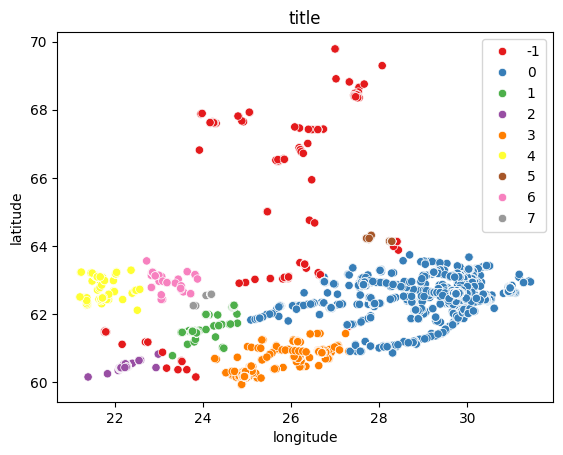

In [25]:
from sklearn.cluster import DBSCAN
import seaborn as sns

db = pd.read_csv('mopsi.txt', sep='\t', header=None, names=['latitude','longitude'])

db['latitude'] = db['latitude'] / 10000
db['longitude'] = db['longitude'] / 10000


# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=50)
labels = dbscan.fit_predict(db)

# # Plotting
sns.scatterplot(data=db, x=db.longitude, y=db.latitude, hue=labels, palette='Set1')
plt.title('title')

In [22]:
sklearn_silhouette = silhouette_score(db, labels)
print("Scikit-learn DBSCAN: ", sklearn_silhouette)

Scikit-learn DBSCAN:  0.7394997311585539
